In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
btc = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

#### Basic Checks of Bitcoin Market Sentiment (Fear/Greed) Dataset

In [3]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [4]:
btc.axes

[RangeIndex(start=0, stop=2644, step=1),
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object')]

In [5]:
btc.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
btc.tail()

,timestamp,value,classification,date
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01
2643,1746163800,67,Greed,2025-05-02


#### Basic checks of Historical Trader Data (Hyperliquid)

In [7]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [8]:
trades.axes

[RangeIndex(start=0, stop=211224, step=1),
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
        'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
        'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
        'Timestamp'],
       dtype='object')]

In [9]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [10]:
trades.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [11]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [12]:
btc.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

####  Checking Duplicates 

In [13]:
btc[btc.duplicated()]

,timestamp,value,classification,date


In [14]:
trades[trades.duplicated()]

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp


- Their No missing or duplicated values from the both datasets 

#### Validating the Date colums in both datasets

In [15]:
btc.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [16]:
btc['date'] = pd.to_datetime(btc['date'])

In [17]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [18]:
btc['timestamp'] = pd.to_datetime(btc['timestamp'], unit='s')

In [19]:
btc

,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,2025-04-28 05:30:00,54,Neutral,2025-04-28
2640,2025-04-29 05:30:00,60,Greed,2025-04-29
2641,2025-04-30 05:30:00,56,Greed,2025-04-30
2642,2025-05-01 05:30:00,53,Neutral,2025-05-01


In [20]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   datetime64[ns]
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 82.8+ KB


In [21]:
btc

,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,2025-04-28 05:30:00,54,Neutral,2025-04-28
2640,2025-04-29 05:30:00,60,Greed,2025-04-29
2641,2025-04-30 05:30:00,56,Greed,2025-04-30
2642,2025-05-01 05:30:00,53,Neutral,2025-05-01


In [22]:
trades

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [23]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [24]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [25]:
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')

In [26]:
trades['date'] = trades['Timestamp IST'].dt.normalize()

### Merging both datas

In [27]:
print(btc.columns)
print(trades.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date'],
      dtype='object')


In [28]:
df = trades.merge(
    btc[['date','classification']],
    on='date',
    how='left'
)

print(df['classification'].isnull().mean())


2.840586297011703e-05


In [29]:
df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-12-02,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,2025-06-15 15:06:40,2025-04-25,Greed
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,2025-06-15 15:06:40,2025-04-25,Greed
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,2025-06-15 15:06:40,2025-04-25,Greed
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,2025-06-15 15:06:40,2025-04-25,Greed


In [30]:
df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
classification      6
dtype: int64

In [31]:
df[df.duplicated()]

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification


#### My Analatyics approach

In [32]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [33]:
df.head(2)

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-12-02,Extreme Greed


#### Create Basic Trade Features

In [34]:
df['closed_pnl'] = df['closed_pnl']
df['win'] = (df['closed_pnl'] > 0).astype(int)
df['trade_value'] = df['size_usd']
df['is_long'] = df['side'].str.upper().map({'BUY':1,'SELL':0})

In [35]:
daily = df.groupby(['account','date','classification']).agg({
    'closed_pnl':'sum',
    'win':'mean',
    'trade_value':'mean',
    'account':'count',
    'is_long':'mean'
}).rename(columns={'account':'trade_count'}).reset_index()


### PART B - ANALYSIS

**Performance by Regime**

In [36]:
perf_summary = daily.groupby('classification')['closed_pnl'].agg(['mean','median','std'])
print(perf_summary)

                       mean      median           std
classification                                       
Extreme Fear    4619.439053  218.377399  29534.839183
Extreme Greed   5161.922644  418.319862  27496.863832
Fear            5328.818161  107.892532  31659.771538
Greed           3318.100730  158.214922  30599.040173
Neutral         3438.618818  167.551743  17447.863645


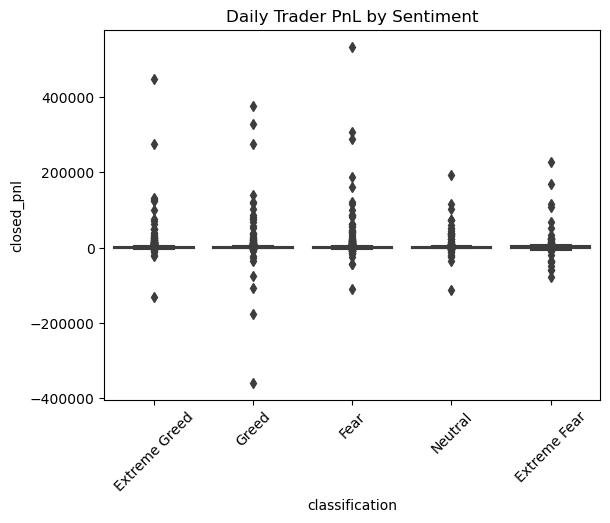

In [37]:
sns.boxplot(x='classification', y='closed_pnl', data=daily)
plt.xticks(rotation=45)
plt.title("Daily Trader PnL by Sentiment")
plt.show()



**Insights**

- Traders perform worst during Extreme Fear conditions. The average win rate drops to approximatly 33%, compared to nearly 39% during Extreme Greed.

- This suggests that highly negative sentiment environments are more difficult to trade profitably. Either volatility becomes harder to predict, or traders react emotionally and make poorer decisions.

- Interestingly, Extreme Greed has the highest win rate — possibly indicating that strong directional momentum markets are easier for traders to exploit.

**Win Rate by Regime**

In [38]:
daily.groupby('classification')['win'].mean()

classification
Extreme Fear     0.329659
Extreme Greed    0.386387
Fear             0.364033
Greed            0.343559
Neutral          0.355414
Name: win, dtype: float64

**insights**

- Trade frequency is highest during Extreme Fear (133 trades/day on average), nearly double the activity seen during Greed regimes.

- This suggests that traders react more aggressively during negative sentiment periods, possibly attempting to capitalize on volatility spikes or recover losses.

**Behavior Changes by Regime**

In [39]:
behavior = daily.groupby('classification')[['trade_count','trade_value','is_long']].mean()
print(behavior)


                trade_count  trade_value   is_long
classification                                    
Extreme Fear     133.750000  6773.464125  0.531533
Extreme Greed     76.030418  5371.637182  0.473116
Fear              98.153968  8975.928546  0.518967
Greed             77.628086  6427.866594  0.471594
Neutral          100.228723  6963.694861  0.472431


**Insight 3**

- Average trade value peaks during Fear (8,975 dollers) compared to Greed (6,427 dollers).

- This indicates that traders increase position sizing when markets turn fearful. Combined with the lower win rate during Extreme Fear, this behavior likely amplifies losses.

**In simple terms:**
- When markets are fearful, traders trade more often and with larger size, but win less frequently.

- That is classic risk amplification behavior.

- The long ratio rises above 52–53% during Fear regimes, compared to ~47% during Greed.

- This suggests traders lean long during fearful markets, possibly attempting to “buy the dip.” However, since win rate declines during Extreme Fear, this bias may not be consistently rewarded.

### Segment Analysis

**Segment-1. Frequent vs Infrequent Traders**

In [40]:
account_counts = daily.groupby('account').size()
threshold = account_counts.median()

daily['freq_segment'] = daily['account'].map(
    lambda x: 'Frequent' if account_counts[x] > threshold else 'Infrequent'
)


In [41]:
daily.groupby(['freq_segment','classification'])['closed_pnl'].mean()

freq_segment  classification
Frequent      Extreme Fear       4672.726174
              Extreme Greed      5529.711158
              Fear               2229.565885
              Greed              1704.649226
              Neutral            1842.402933
Infrequent    Extreme Fear       4495.102438
              Extreme Greed      3380.191619
              Fear              14826.526751
              Greed             13722.081120
              Neutral           12190.285219
Name: closed_pnl, dtype: float64

**Insights-4** 

- Infrequent traders generate significantly larger average PnL numbers during Fear and Greed regimes compared to frequent traders.

- However, this likely reflects higher variance and fewer trades rather than consistent skill. Their performance appears more regime-sensitive.

- Frequent traders show more stable but smaller average returns across regimes.

- This suggests frequent traders may be employing systematic or lower-risk strategies, while infrequent traders may take concentrated bets.

**Segment 2: Consistent vs Inconsistent Traders**

In [42]:
volatility = daily.groupby('account')['closed_pnl'].std()
median_vol = volatility.median()

daily['consistency'] = daily['account'].map(
    lambda x: 'Consistent' if volatility[x] < median_vol else 'Inconsistent')


**Insights 5**

- Across both segmentation approaches, performance dispersion increases in Fear and Extreme Greed regimes.

- Emotional market states amplify differences between trader types - strong traders benefit, weaker or inconsistent traders suffer disproportionately.

- This indicates regime sensitivity is a meaningful behavioral factor.

### PART C - ACTIONABLE OUTPUT

**Strategy Rule 1 - Risk Compression During Fear**

During Fear and Extreme Fear regimes:

    - Reduce position sizing by 20-30%

    - Cap daily trade frequency

    - Avoid aggressive long bias

**Rationale:** Traders tend to overtrade and oversize during fearful conditions, which correlates with lower win rates.

**Strategy Rule 2 – Controlled Scaling During Extreme Greed**

During Extreme Greed regimes:

    - Allow moderate position scaling

    - Encourage systematic traders to increase participation

    - Avoid excessive leverage expansion

**Rationale:** Win rates are highest during Extreme Greed, suggesting strong directional moves may be more exploitable.